<a href="https://colab.research.google.com/github/44REAM/CEB-image_processing/blob/main/Frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frequency domain, image restoration and image reconstruction

---

Slide Aj Ratchainan 2, 4

# Concepts

## Fourier series

Function f(t) that is a periodic function with period $T$ can be written in the form of summation of sines and cosines functions multipled by a cofficient.

$$f(t) = \frac{a_0}{2} + \sum^∞_{n= 0}( a_n cos(\frac{2πn}{T}t) + b_n sin(\frac{2πn}{T}t) )$$

with some algebratic manipulation using Euler's formula ($e^{iθ} = \text{cos}θ + i\text{sin}(θ)$)

$$f(t) =\sum^∞_{n= -∞} c_n e^{i2πnt/T} $$ 


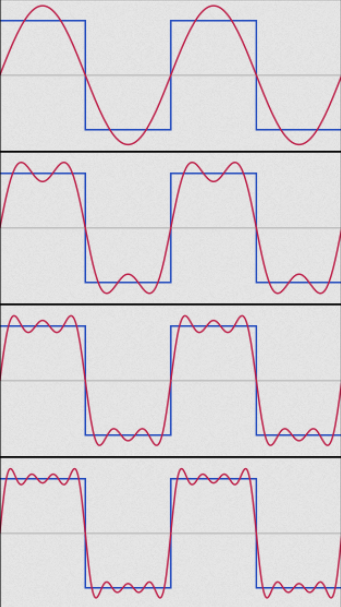

https://en.wikipedia.org/wiki/Fourier_series

We want to find cofficient of complex exponential $c_n$. Because $e^{i2πnt/T}$ and $e^{-i2πmt/T}$ are orthogonal to each other when $n \neq m$. We can find $c_n$ by 

$$c_n = \int^∞_{-∞} f(t)e^{-i2πnt/T} dt$$

**Further reading**

https://www.youtube.com/watch?v=UKHBWzoOKsY



## Fourier transform



When f(t) is not a periodic function, we can use fourier transform. Denote that fourier transform ($\mathcal{F}$) of $f(t)$ can be written by 
$$\mathcal{F}(f(t)) = F(μ)$$.

and inverted fourier transform can be written by

$$\mathcal{F}^{-1}(F(μ)) = f(t)$$

Relation to fourier series

$$f(t) = \sum^∞_{n= -∞} c_n e^{i2πnt/T}$$

we can find fourier series of $f(t)$ ($f(t)$ can be non-periodic function) by let $T → ∞$

$$\text{lim}_{T → ∞} f(t) = ∫^{∞}_{-∞} F(μ) e^{j2πμt} dμ \tag{1}$$

Then we can find $F(μ)$ by using orthogonal property of $e^{j2πμt}$.

$$F(μ) = ∫^{∞}_{-∞} f(t)e^{-j2πμt} dt \tag{2}$$

Equation (1) and (2) are related to each other which called Fourier transform pair, denote as $f(t) ⇔ F(μ)$.  The double arrow indicates that the expression on the right is obtained by taking the forward Fourier transform of the expression on the left, while the expression on the left is obtained by taking the inverse Fourier transform of the expression on the right.

## Fourier transform property $f(t) ⇔ F(\mu)$

https://en.wikipedia.org/wiki/Fourier_transform#Basic_properties

## Discrete fourier transform

## 2D fourier transform

# Applications

## Filtering in frequency domain

Filtering in frequency domain is more inutitive than filtering in spatial domain. 

$$f'(t) = \text{Real} [ \mathcal{F}^{-1}(F(u,v)H(u,v))]$$

where $F(u, v)$ is DFT of the input image $f(t)$, $H(u,v)$ is a filter transfer function and $f'(t)$ is filtered image.

## Image restoration

## CT image reconstruction